In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv.zip', compression='infer')

In [3]:
test = pd.read_csv('../input/test.csv.zip', compression='infer')

In [4]:
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


Obtaining the score for the baseline model (which is predicting the **mean** of the training dataset for each entry in the test set)

In [5]:
submission = pd.DataFrame(index=test['ID'])
submission['target'] = train['target'].mean()
submission.to_csv('../output/00.baseline_submission_mean.csv')

In [6]:
def RMSLE(y, y_pred):
    import numpy as np
    
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y))**2))


RMSLE(train['target'], [train['target'].mean()]*len(train))

2.0718031227318616

Obtaining the score for the baseline model (which is predicting the **median** of the training dataset for each entry in the test set)

In [7]:
submission = pd.DataFrame(index=test['ID'])
submission['target'] = train['target'].median()
submission.to_csv('../output/01.baseline_submission_median.csv')

In [8]:
RMSLE(train['target'], [train['target'].median()]*len(train))

1.7563900149398604

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train.drop(['ID', 'target'], axis=1))

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
pca.explained_variance_ratio_

array([0.05292251, 0.03453412])

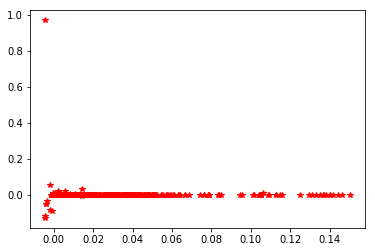

In [30]:
plt.plot(pca.components_[0], pca.components_[1], 'r*')

Applying PCA does not give me any advantage, as the first PC explains only 5% of the variance in the dataset, thus using it to predict the target will not bring me anywhere close to the correct values.

In [12]:
train.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


Let's benchmark a linear regression model.

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error

In [14]:
import numpy as np

lm1 = linear_model.LinearRegression()

X = train.drop(['ID', 'target'], axis=1)
y = train['target']

lm1.fit(X, y)

y_pred = lm1.predict(X)

In [15]:
RMSLE(y,y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log1p
  after removing the cwd from sys.path.


0.09961556121374594

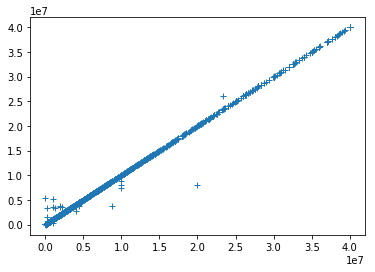

In [16]:
plt.plot(y,y_pred,'+')

In [26]:
lm1.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [17]:
submission = pd.DataFrame(index=test['ID'])
submission['target'] = lm1.predict(test.drop(['ID'], axis=1))

# removing the negative values
submission[submission['target'] <= 0] = lm1.intercept_

submission.to_csv('../output/03.linear_regression.csv')

In [18]:
submission.head()

,target
ID,
000137c73,4.605837e+14
00021489f,1.164492e+14
0004d7953,3.528925e+12
00056a333,3.559111e+06
00056d8eb,4.279505e+12


In [19]:
print(train['target'].median())
print(lm1.intercept_)
print(train['target'].mean())

2260000.0
3559111.1782375025
5944923.322036331


In [20]:
submission['target'].mean()

79585302250177.84